This notebook focusses on the calculation of dipole autocorellation functions presented in the paper.

In [1]:
import numpy as np
import ase

In [2]:
bigar=[]
for k in range(6261,16182,5):
    bigar.append(np.loadtxt("dipoles/Sys"+str(k)+"/dipoles.out")[54:108,:])

For the mobile dipoles we calculate the autocorellation function for each tin atom individually allowing us to plot them out later. This code works on multiple time origins and cycles through a preloaded array of dipoles

In [3]:
corset=[]
from tqdm import tqdm
import scipy.linalg

for n in tqdm(range(54)):
    cor=[]
    for k in (range(0,len(bigar),1)):
        buffer=0
        denom=len(range(0,len(bigar)-k))
        for j in range(0,len(bigar)-k):
            v1=bigar[j][n,:]
            v2=bigar[k+j][n,:]
            buffer+=((np.sum(v1*v2)/scipy.linalg.norm(v1)/scipy.linalg.norm(v2)))
        cor.append(buffer/denom)
    corset.append(cor)

100%|███████████████████████████████████████████| 54/54 [34:58<00:00, 38.86s/it]


In [4]:
cor2=[]
import scipy.linalg
from tqdm import tqdm
for k in tqdm(range(0,5500-71,20)):
    buffer=0
    denom=len(range(71,5500-k,20))
    for j in range(71,5500-k,20):
        v1=np.loadtxt("static_dipoles/Sys"+str(j)+"/dipoles.out")[54:108,:]
        v2=np.loadtxt("static_dipoles/Sys"+str(j+k)+"/dipoles.out")[54:108,:]
        buffer+=(np.mean(np.sum(v1*v2,axis=1)/scipy.linalg.norm(v1,axis=1)/scipy.linalg.norm(v2,axis=1)))
    cor2.append(buffer/denom)

100%|█████████████████████████████████████████| 272/272 [00:42<00:00,  6.36it/s]


(0.0, 30.0)

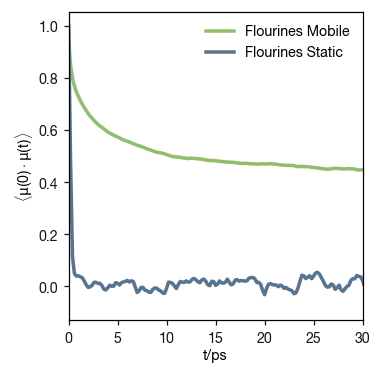

In [5]:
import matplotlib.pyplot as plt
from figure_formatting import figure_formatting as ff
ff.set_formatting()
plt.figure(figsize=(3,3))
plt.plot((np.arange(0,16182-6261,5)/100),np.mean(corset,axis=0),linewidth=2,color='#90BE6D',label='Flourines Mobile')
plt.xlabel('t/ps')
plt.ylabel(r'$\langle \mathbf{\mu}(0)\cdot \mathbf{\mu}(t)\rangle$')
plt.tight_layout()
plt.plot(np.arange(0,5500-71,20)*10/1000,cor2,linewidth=2,color='#577590',label='Flourines Static')
plt.legend()
plt.xlim(0,30)
#plt.savefig('auto_corellation.pdf')

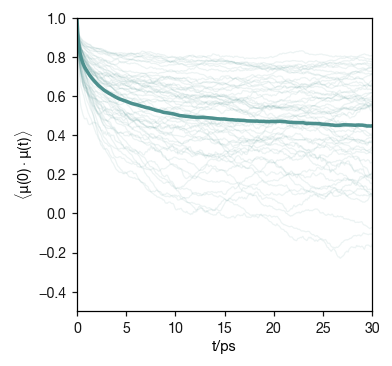

In [6]:
back=[]
plt.figure(figsize=(3,3))
for k in range(54):
    plt.plot((np.arange(0,16182-6261,5)/100),corset[k],c='#4D908E',alpha=.1)
plt.plot((np.arange(0,16182-6261,5)/100),np.mean(corset,axis=0),c='#4D908E',linewidth=2)
plt.xlim(0,30)
plt.ylim(-.5,1)
plt.xlabel('t/ps')
plt.ylabel(r'$\langle \mathbf{\mu}(0)\cdot \mathbf{\mu}(t)\rangle$')
plt.savefig('dipole_corrlation_all.pdf')